In [87]:
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv")

# Preview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Select Relevant Features
 
We focus on `Fare` as the target variable, and use `Age`, `Pclass`, and `Sex` as predictors. These features are chosen for their relevance and variety (numerical, ordinal, categorical).

In [88]:
# Select features: Fare (target), Age, Pclass, Sex
df_selection = df[["Fare", "Age", "Pclass", "Sex"]].copy()
df_selection.head(20)

,Fare,Age,Pclass,Sex
0,7.2500,22.0,3,male
1,71.2833,38.0,1,female
2,7.9250,26.0,3,female
3,53.1000,35.0,1,female
4,8.0500,35.0,3,male
5,8.4583,NaN,3,male
6,51.8625,54.0,1,male
7,21.0750,2.0,3,male
8,11.1333,27.0,3,female
9,30.0708,14.0,2,female


## Step 3: Handle Missing Values and Encode Categorical Data

- Fill missing `Age` values with the median.


In [89]:
# Show missing values before cleaning
print("Missing values before cleaning:")
print(df_selection.isnull().sum())

Missing values before cleaning:
Fare        0
Age       177
Pclass      0
Sex         0
dtype: int64


In [90]:
# Create a copy for cleaning
df_clean = df_selection.copy()

# # Fill missing Age values with the median (remember we have other options like mean or mode or even dropping rows)
df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].median())

# Show missing values after cleaning
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

# # Preview cleaned data
df_clean.head()


Missing values after cleaning:
Fare      0
Age       0
Pclass    0
Sex       0
dtype: int64


,Fare,Age,Pclass,Sex
0,7.2500,22.0,3,male
1,71.2833,38.0,1,female
2,7.9250,26.0,3,female
3,53.1000,35.0,1,female
4,8.0500,35.0,3,male


### Encoding

- Encode `Sex`: male = 0, female = 1: Converting the `Sex` column from text to numbers is necessary because machine learning algorithms require numerical input. Here, we map the categorical values from type `object` (`"male"`, `"female"`) to type `int` (`0` for male, `1` for female) so the model can process this feature mathematically. 

In [91]:
# Encode 'Sex': male = 0, female = 1
if df_clean["Sex"].dtype == "object":
    df_clean["Sex"] = df_clean["Sex"].map({"male": 0, "female": 1})
df_clean.head()

,Fare,Age,Pclass,Sex
0,7.2500,22.0,3,0
1,71.2833,38.0,1,1
2,7.9250,26.0,3,1
3,53.1000,35.0,1,1
4,8.0500,35.0,3,0


 
## Step 4: Standardize Input Features

Standardization ensures all features have mean 0 and variance 1, improving gradient descent performance. This process helps the algorithm converge faster and prevents features with larger scales from dominating the learning process.

**Mathematical Formula:**

For each feature $x$, standardization transforms it as follows:

$$
x_{\text{standardized}} = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ = original feature value
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation of the feature

After standardization:
- The mean of the feature becomes 0.
- The standard deviation becomes 1.

This transformation is applied independently to each feature column in the dataset.

In [92]:
# Step 4: Standardize Input Features and Prepare Data for Linear Regression

from sklearn.preprocessing import StandardScaler

# Select input features and target variable
features = df_clean[["Age", "Pclass", "Sex"]].values  # Predictor (independent) variables

# Standardize features: transforms each feature to have mean 0 and standard deviation 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
print("Standardized features (first 5 rows):")
print(X_scaled[:5])

Standardized features (first 5 rows):
[[-0.56573646  0.82737724 -0.73769513]
 [ 0.66386103 -1.56610693  1.35557354]
 [-0.25833709  0.82737724  1.35557354]
 [ 0.4333115  -1.56610693  1.35557354]
 [ 0.4333115   0.82737724 -0.73769513]]


#### Why don't we standardize the target variable?

We do not standardize the target variable (`Fare`) because we want our predictions to be in the original units (dollars), making them interpretable and meaningful. Standardization is applied to input features to help the optimization process, but the target should remain unchanged so the model learns to predict actual fare values.

#### Why do we reshape the target variable?

Many machine learning algorithms, including gradient descent, expect the target variable to be a 2D array with one column (a column vector) rather than a 1D array. By default, pandas returns the `Fare` column as a 1D array with shape `(891,)`, which is just a vector. We reshape it to `(891, 1)`, making it a column vector (matrix with one column). This reshaping does **not** change the values—only the structure—ensuring compatibility with matrix operations required by most algorithms.

In [93]:
# Show 'Fare' as a 1D array (default from pandas)
fare_1d = df_clean["Fare"].values
print("Fare as 1D array (first 5 values):")
print(fare_1d[:5])
print("Shape:", fare_1d.shape)

# Reshape to 2D column vector
target = df_clean["Fare"].values.reshape(-1, 1)
print("\nFare as 2D column vector (first 5 rows):")
print(target[:5])
print("Shape:", target.shape)

# (891,) is a 1D vector.
# (891, 1) is a 2D column vector (matrix with one column).
# Reshaping is needed for matrix operations in machine learning.

Fare as 1D array (first 5 values):
[ 7.25   71.2833  7.925  53.1     8.05  ]
Shape: (891,)

Fare as 2D column vector (first 5 rows):
[[ 7.25  ]
 [71.2833]
 [ 7.925 ]
 [53.1   ]
 [ 8.05  ]]
Shape: (891, 1)


### Why Add a Bias (Intercept) Column?

In linear regression, the bias (also called the intercept) allows the model to fit data that does not pass through the origin. By adding a column of ones to our input features, we enable the model to learn an intercept term, often denoted as $\theta$.

**Mathematical Model:**

The linear regression model with bias is:

$$
\hat{y} = \theta + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n
$$

- $\hat{y}$: predicted value
- $\theta$: intercept (bias), also known as the **y-intercept** (the value of $\hat{y}$ when all $x_i = 0$)
- $w_1, w_2, ..., w_n$: weights for each independent variable (feature)
- $x_1, x_2, ..., x_n$: standardized feature values


$\theta$ is the point where the regression line crosses the y-axis (y-intercept) when all input features are zero.  
Adding the bias column ensures the model can shift the regression line up or down to better match.


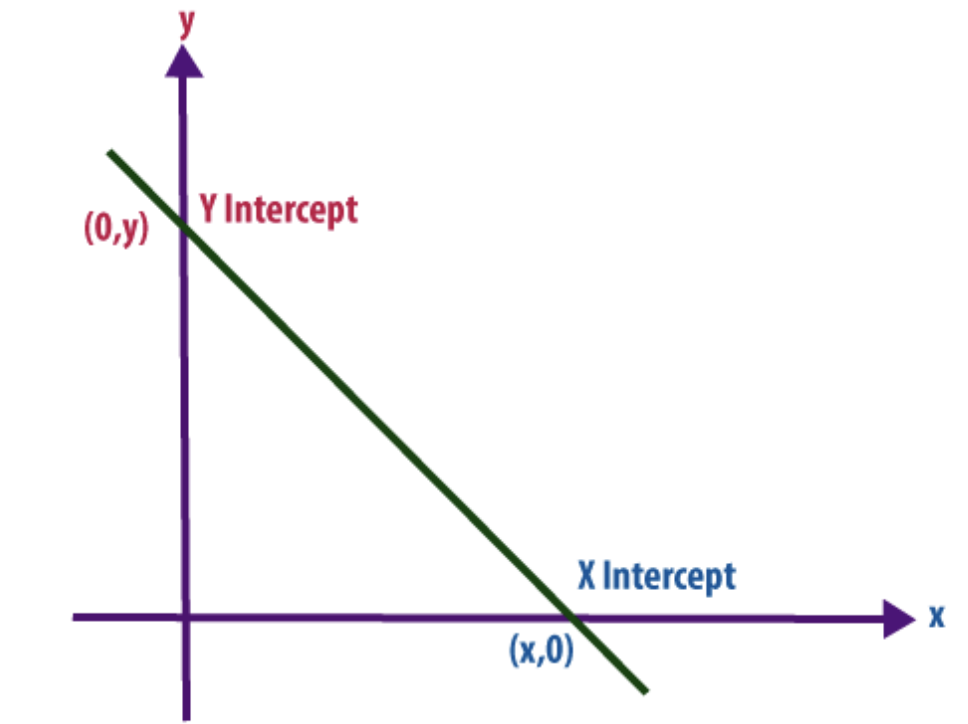


In [94]:
# Add bias column (intercept term) to the input features
# This allows the linear regression model to learn an intercept (theta_0)
import numpy as np
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
print("Features with bias column added (first 5 rows):")
print(X_b[:5])


# First column is the bias (intercept) term, which is 1 for all samples.
# Last column is:
    # Males (0) become a negative value (like -0.73769513)
    # Females (1) become a positive value (like 1.35557354)

Features with bias column added (first 5 rows):
[[ 1.         -0.56573646  0.82737724 -0.73769513]
 [ 1.          0.66386103 -1.56610693  1.35557354]
 [ 1.         -0.25833709  0.82737724  1.35557354]
 [ 1.          0.4333115  -1.56610693  1.35557354]
 [ 1.          0.4333115   0.82737724 -0.73769513]]


## Step 5: Linear Regression Model

In this step, we use our standardized features and bias column to make predictions using the linear regression model. The model equation is:

$$
\hat{y} = \theta + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n
$$

Where:
- $\hat{y}$: predicted fare
- $\theta$: intercept (bias)
- $w_1, w_2, ..., w_n$: weights for each feature
- $x_1, x_2, ..., x_n$: standardized feature values

We'll start by initializing all weights (including the bias) to zero and calculate the predicted fares for the first few passengers.

In [95]:
# Step 5: Linear Regression Model

# Initialize weights (including bias) to zero
initial_theta = np.zeros((X_b.shape[1], 1))

# Make predictions using the linear regression model
y_pred = X_b.dot(initial_theta)

# Show predictions for the first 5 passengers
print("Predicted fares with initial weights (first 5):")

print(y_pred[:5])

Predicted fares with initial weights (first 5):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Step 6: Cost Function (Mean Squared Error)

To measure how well our linear regression model fits the data, we use a cost function. The most common cost function for regression is **Mean Squared Error (MSE)**, which calculates the average squared difference between the predicted fares and the actual fares.

**Mathematical Formula:**

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

Where:
- $m$: number of samples
- $\hat{y}_i$: predicted fare for passenger $i$
- $y_i$: actual fare for passenger $i$

A lower MSE means better predictions. Our goal is to minimize this value.

In [100]:
# Step 6: Cost Function (Mean Squared Error)

# Calculate Mean Squared Error for initial predictions
mse = np.mean((y_pred - target) ** 2)
print("Initial Mean Squared Error (MSE):", mse)

Initial Mean Squared Error (MSE): 3503.7763225682493


## Step 7: Gradient Descent to Minimize MSE

Gradient descent is an optimization algorithm used to minimize the cost function (Mean Squared Error) by iteratively updating the model parameters (weights and bias). At each iteration, the algorithm calculates the gradients (how much each parameter should change) and adjusts the parameters in the direction that reduces the error. Over many iterations, this process finds the best-fitting line for the data.

- **Initialize parameters** randomly.
- **Compute gradients** based on current predictions.
- **Update parameters** using the gradients and learning rate.
- **Repeat** for a set number of iterations or until convergence.

The result is a set of parameters that minimize the MSE and provide the best linear fit to the data.

In [101]:
# Step 7: Gradient Descent to Minimize MSE

# Initialize parameters randomly
theta = np.random.randn(X_b.shape[1], 1)
learning_rate = 0.1
n_iterations = 50
m = len(X_b)

cost_history = []

for iteration in range(n_iterations):
    # Compute gradients
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - target)
    # Update parameters
    theta -= learning_rate * gradients
    # Calculate and record MSE
    mse = np.mean((X_b.dot(theta) - target)**2)
    cost_history.append(mse)

print("Learned parameters (theta):", theta.ravel())
print(cost_history)

Learned parameters (theta): [ 32.20375496  -4.32528514 -28.08734578   5.00696896]
[np.float64(2838.206337592901), np.float64(2418.7739938046593), np.float64(2156.862011717167), np.float64(1991.342864677495), np.float64(1885.4590177168627), np.float64(1816.8824267645025), np.float64(1771.9101362431948), np.float64(1742.044637001392), np.float64(1721.9607383507855), np.float64(1708.2855585780044), np.float64(1698.8595971590626), np.float64(1692.2849957256271), np.float64(1687.6467866339635), np.float64(1684.339277598728), np.float64(1681.956905529553), np.float64(1680.224973249037), np.float64(1678.9552765024334), np.float64(1678.0174011318904), np.float64(1677.3199727187105), np.float64(1676.798283606826), np.float64(1676.406043531711), np.float64(1676.1098213439036), np.float64(1675.8852597395037), np.float64(1675.714469610858), np.float64(1675.5842171541651), np.float64(1675.4846492472589), np.float64(1675.4083881324646), np.float64(1675.3498821409412), np.float64(1675.3049357807088),

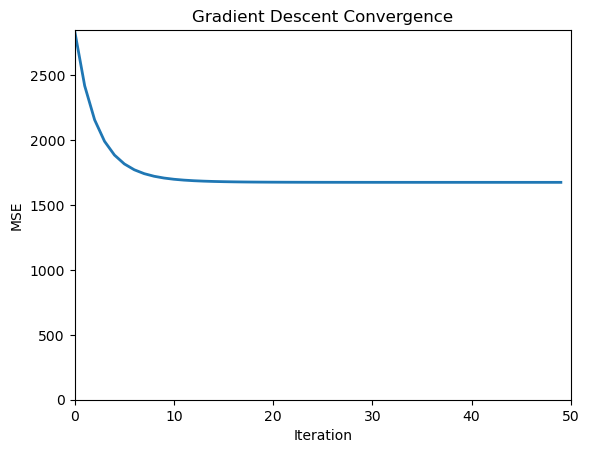

In [102]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, len(cost_history))
ax.set_ylim(0, max(cost_history) + 10)
line, = ax.plot([], [], lw=2)
ax.set_xlabel("Iteration")
ax.set_ylabel("MSE")
ax.set_title("Gradient Descent Convergence")

x_data, y_data = [], []

def update(frame):
    x_data.append(frame)
    y_data.append(cost_history[frame])
    line.set_data(x_data, y_data)
    return line,

ani = FuncAnimation(fig, update, frames=len(cost_history), blit=True, interval=50, repeat=False)

HTML(ani.to_jshtml())


### All of the above together with visualization of gradient descent and cost function

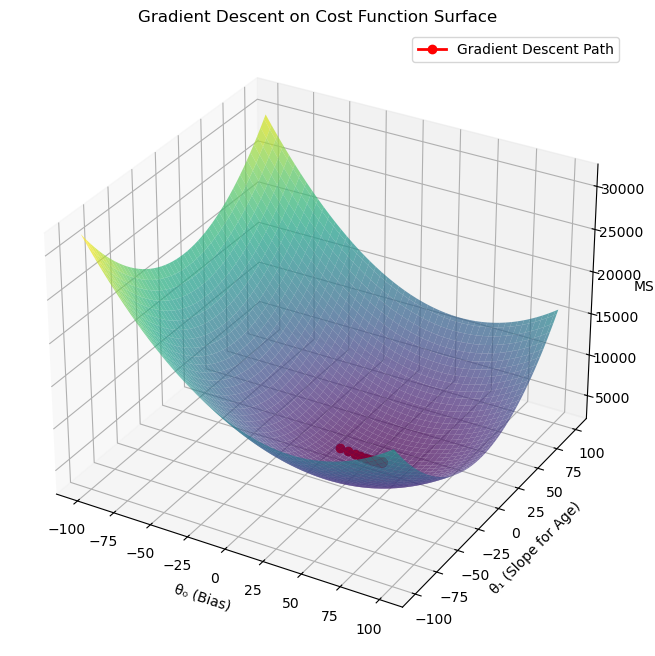

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load Titanic training data
df = pd.read_csv("train.csv")
df = df[["Fare", "Age"]].dropna()

# Prepare data
X = df[["Age"]].values
y = df["Fare"].values.reshape(-1, 1)

# Standardize feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Gradient descent setup
theta = np.random.randn(2, 1)
learning_rate = 0.1
n_iterations = 100
m = len(X_b)

cost_history = []
theta_history = []

# Run gradient descent and track theta + cost
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients
    mse = np.mean((X_b.dot(theta) - y)**2)

    cost_history.append(mse)
    theta_history.append(theta.copy())

# Surface for cost function
theta0_vals = np.linspace(-100, 100, 100)
theta1_vals = np.linspace(-100, 100, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        y_pred = t0 + t1 * X_b[:, 1]
        J_vals[j, i] = np.mean((y_pred.reshape(-1, 1) - y)**2)

# Extract path
theta0_path = [t[0][0] for t in theta_history]
theta1_path = [t[1][0] for t in theta_history]

# Plot cost surface and path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

ax.plot_surface(T0, T1, J_vals, cmap="viridis", alpha=0.7)
ax.plot(theta0_path, theta1_path, cost_history, color="red", marker="o", linewidth=2, label="Gradient Descent Path")

ax.set_xlabel("θ₀ (Bias)")
ax.set_ylabel("θ₁ (Slope for Age)")
ax.set_zlabel("MSE")
ax.set_title("Gradient Descent on Cost Function Surface")
ax.legend()
plt.show()
